<a href="https://colab.research.google.com/github/SebastianLarssonDTU/02456-Reinforcement-Learning-Project/blob/restructure_code/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INIT : Procgen, Drive, Git

In [10]:
!pip install procgen

In [11]:
#Clone git
!git clone -b restructure_code https://github.com/SebastianLarssonDTU/02456-Reinforcement-Learning-Project.git "my_project"

Cloning into 'my_project'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 252 (delta 14), reused 13 (delta 0), pack-reused 223
Receiving objects: 100% (252/252), 841.08 KiB | 27.13 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [12]:
#update git
%cd /content/my_project
! git pull

/content/my_project
Already up to date.


In [13]:
import datatools as tools
from datatools import DATA_PATH, MODEL_PATH
#Mount drive
tools.mount_drive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# TESTING

In [14]:
#Import all custom files
import baseline
import datatools as tools
import hyperparameters as h
import model
import my_util
import policy
import ppo
import utils

#other imports
import torch

#import specific methods
from baseline import set_hyperparameters
from ppo import PPO
from experiments import run_experiment, print_list_of_experiments


In [15]:
print_list_of_experiments()

***** Experiment 0 *****
Description:    Baseline inspired by PPO article
***** Experiment 1 *****
Description:    Baseline inspired by Procgen article
***** Experiment 2 *****
Description:    Modified PPO baseline with value clipping enabled
***** Experiment 3 *****
Description:    Modified PPO baseline with value clipping enabled and learning rate given by par variable
***** Experiment 4 *****
Description:    Modified PPO baseline with value clipping enabled and reward penalty of -1 on death
***** Experiment 5 *****
Description:    Baseline inspired by IMPALA paper (No value clipping)
***** Experiment 6 *****
Description:    Inspired by IMPALA paper (With value clipping)
***** Experiment 7 *****
Description:    Inspired by both IMPALA and Procgen papers (With value clipping)


## Run experiments



In [9]:
INDEX = tools.create_index_table_from_txt_files()
INDEX

,file_name,total_steps,num_envs,num_levels,num_steps,num_epochs,batch_size,eps,grad_eps,value_coef,entropy_coef,lr,opt_extra,gamma,lmbda,version,optimizer,Time limit,Time spent (in seconds),Steps taken,Done,time_limit,Time spent (in seconds),Steps taken,Done,value_clipping,death_penalty,eval,eval_cycle,Last Mean Reward
Value,Baseline(PPO)_Run_15Nov_13h11m00s,8000000.0,32,10,128,3,256,0.1,0.5,1,0.01,0.00025,1e-05,0.99,0.95,Baseline(PPO),Adam,12:30:0,11253.99,8003584,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0625
Value,Baseline(Procgen)_Run_15Nov_16h18m34s,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,1e-05,0.999,0.95,Baseline(Procgen),Adam,12:30:0,10962.17,8003584,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.71875
Value,Baseline(PPO)_Run_16Nov_20h08m12s,8000000.0,32,10,128,3,256,0.1,0.5,1,0.01,0.00025,1e-05,0.99,0.95,Baseline(PPO),Adam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0625
Value,Baseline(Procgen)_Run_17Nov_14h07m08s,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,NaN,0.999,0.95,Baseline(Procgen),NaN,NaN,NaN,NaN,NaN,43200,16572.48,8003584,False,NaN,NaN,NaN,NaN,20.1875
Value,Experiment0_Run_26Nov_15h21m41s,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,NaN,0.99,0.95,Experiment0,NaN,NaN,NaN,NaN,NaN,43200,18858.62,8003584,False,False,False,True,16,20.34375
Value,Experiment1_Run_26Nov_15h22m38s,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,NaN,0.999,0.95,Experiment1,NaN,NaN,NaN,NaN,NaN,43200,19818.86,8003584,False,False,False,True,16,19.53125
Value,Experiment2_Run_26Nov_22h02m36s,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,NaN,0.999,0.95,Experiment2,NaN,NaN,NaN,NaN,NaN,43200,20771.90,8003584,False,True,False,True,16,23.96875
Value,Experiment2_Run_27Nov_11h05m48s,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,NaN,0.99,0.95,Experiment2,NaN,NaN,NaN,NaN,NaN,43200,20480.86,8003584,False,True,False,True,16,28.15625
Value,Experiment4_Run_27Nov_11h07m20s,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,NaN,0.99,0.95,Experiment4,NaN,NaN,NaN,NaN,NaN,43200,20819.16,8003584,False,True,True,True,16,25.8125
Value,Experiment5_Run_27Nov_16h37m42s,8000000.0,32,10,256,3,32,0.2,0.5,0.5,0.01,0.0006,NaN,0.99,0.95,Experiment5,NaN,NaN,NaN,NaN,NaN,43200,NaN,NaN,NaN,False,False,True,16,14.8125


In [48]:
n=6

file_names = []
for i in range(n):
  file_names.append(INDEX['file_name'][-1-i].strip())

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_graphs(file_names):
  df = pd.DataFrame(columns=file_names)
  for file_name in file_names:
    df[file_name] = pd.read_csv(DATA_PATH + file_name+".csv")[" Mean reward"]
  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  plt.title("Training")

def plot_eval_graphs(file_names):
  df = pd.DataFrame(columns=file_names)
  for file_name in file_names:
    temp = pd.read_csv(DATA_PATH + file_name+"_EVAL.csv")
    df[file_name] = temp["avg"]
  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  plt.title("Eval")

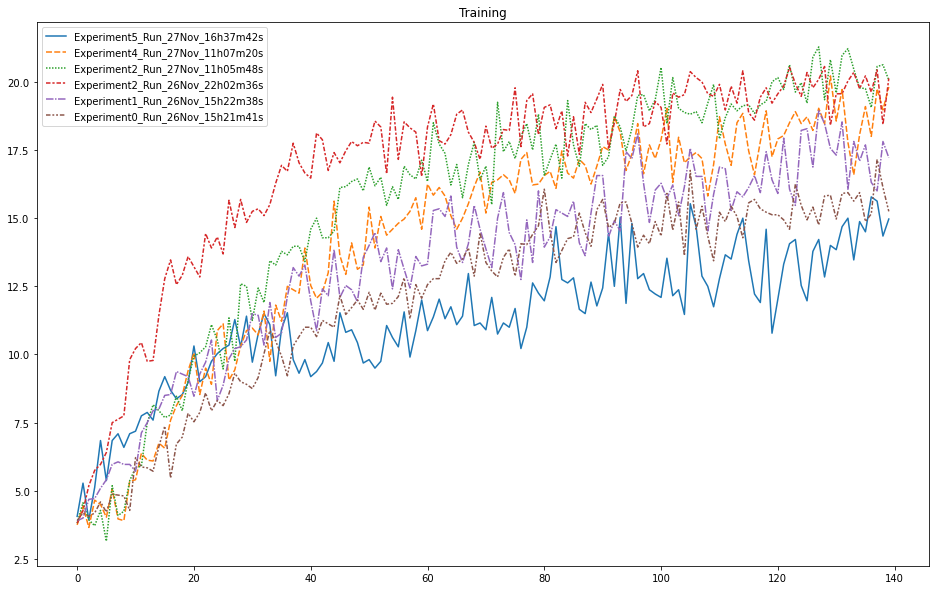

In [65]:
plot_training_graphs(file_names)

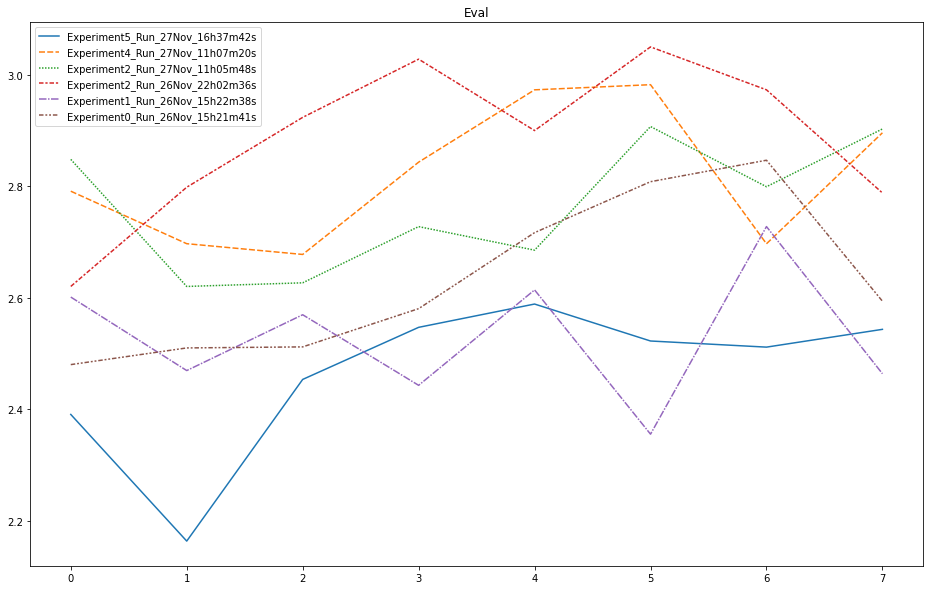

In [66]:
plot_eval_graphs(file_names)